In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all';

In [2]:
df = pd.read_csv("survey_results_public.csv", header=0,
                 usecols=[ 'ConvertedComp','Age','CompTotal','WorkWeekHrs', 'CodeRevHrs'  ])

In [3]:
df

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
0,NaN,NaN,NaN,NaN,14.0
1,NaN,NaN,NaN,NaN,19.0
2,23000.0,8820.0,40.0,NaN,28.0
3,61000.0,61000.0,80.0,NaN,22.0
4,NaN,NaN,55.0,NaN,30.0
...,...,...,...,...,...
2994,NaN,NaN,40.0,4.0,NaN
2995,23000.0,75876.0,45.0,3.0,29.0
2996,NaN,NaN,NaN,NaN,20.0
2997,90000.0,1080000.0,80.0,NaN,31.0


In [4]:
df = df.dropna()

In [5]:
df.dtypes

CompTotal        float64
ConvertedComp    float64
WorkWeekHrs      float64
CodeRevHrs       float64
Age              float64
dtype: object

In [6]:
corr = df.corr()

In [7]:
corr

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
CompTotal,1.000000,-0.028891,-0.015671,-0.026525,0.016447
ConvertedComp,-0.028891,1.000000,-0.004572,-0.073048,0.099926
WorkWeekHrs,-0.015671,-0.004572,1.000000,0.027850,-0.005370
CodeRevHrs,-0.026525,-0.073048,0.027850,1.000000,-0.039880
Age,0.016447,0.099926,-0.005370,-0.039880,1.000000


In [8]:
corr.style.background_gradient(cmap='PuBu').set_properties(**{'font-size': '0pt'})

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
CompTotal,1.000000,-0.028891,-0.015671,-0.026525,0.016447
ConvertedComp,-0.028891,1.000000,-0.004572,-0.073048,0.099926
WorkWeekHrs,-0.015671,-0.004572,1.000000,0.027850,-0.005370
CodeRevHrs,-0.026525,-0.073048,0.027850,1.000000,-0.039880
Age,0.016447,0.099926,-0.005370,-0.039880,1.000000


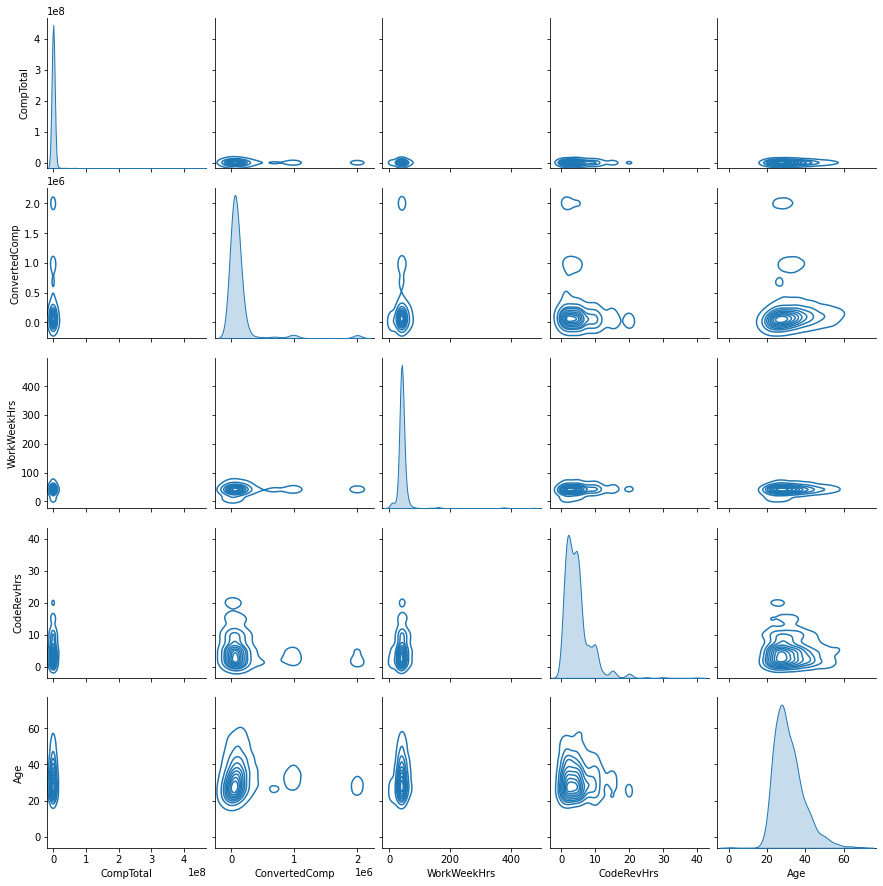

In [9]:
sns.pairplot(df, kind="kde")

In [35]:
df = pd.read_csv("survey_results_public.csv", header=0,
                 usecols=['Hobbyist', "Gender",'ConvertedComp', 'CodeRevHrs', "YearsCode"])
df = df.dropna()

In [14]:
df

,Hobbyist,ConvertedComp,CodeRevHrs,Gender
8,Yes,95179.0,12.0,Man
12,Yes,90000.0,5.0,Man
13,Yes,57060.0,4.0,Man
16,Yes,65277.0,5.0,Man
17,Yes,21996.0,0.5,Man
...,...,...,...,...
2988,Yes,18336.0,2.0,Man
2989,Yes,6996.0,5.0,Man
2990,Yes,8184.0,5.0,Man
2995,Yes,75876.0,3.0,Man


In [15]:
#konwertacja na dane numeryczne:
map_function = {'Yes': 1, 'No': 0}
df['Hobbyist'] = df['Hobbyist'].map(map_function)

In [16]:
df

,Hobbyist,ConvertedComp,CodeRevHrs,Gender
8,1,95179.0,12.0,Man
12,1,90000.0,5.0,Man
13,1,57060.0,4.0,Man
16,1,65277.0,5.0,Man
17,1,21996.0,0.5,Man
...,...,...,...,...
2988,1,18336.0,2.0,Man
2989,1,6996.0,5.0,Man
2990,1,8184.0,5.0,Man
2995,1,75876.0,3.0,Man


In [17]:
df = df[df['Gender'].isin(['Woman', 'Man'])] #filtruje wiersze zawierajace okreslona wartosc
df = pd.get_dummies(df, columns=['Gender'])

In [18]:
df

,Hobbyist,ConvertedComp,CodeRevHrs,Gender_Man,Gender_Woman
8,1,95179.0,12.0,1,0
12,1,90000.0,5.0,1,0
13,1,57060.0,4.0,1,0
16,1,65277.0,5.0,1,0
17,1,21996.0,0.5,1,0
...,...,...,...,...,...
2988,1,18336.0,2.0,1,0
2989,1,6996.0,5.0,1,0
2990,1,8184.0,5.0,1,0
2995,1,75876.0,3.0,1,0


In [19]:
# removing outliers / Use quantile
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Hobbyist             0.00
ConvertedComp    75590.25
CodeRevHrs           3.00
Gender_Man           0.00
Gender_Woman         0.00
dtype: float64


In [20]:
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [21]:
df1

,Hobbyist,ConvertedComp,CodeRevHrs,Gender_Man,Gender_Woman
12,1,90000.0,5.0,1,0
13,1,57060.0,4.0,1,0
16,1,65277.0,5.0,1,0
17,1,21996.0,0.5,1,0
18,1,31140.0,3.0,1,0
...,...,...,...,...,...
2988,1,18336.0,2.0,1,0
2989,1,6996.0,5.0,1,0
2990,1,8184.0,5.0,1,0
2995,1,75876.0,3.0,1,0


In [22]:
df1.shape

(838, 5)

In [23]:
df1.corr()

,Hobbyist,ConvertedComp,CodeRevHrs,Gender_Man,Gender_Woman
Hobbyist,NaN,NaN,NaN,NaN,NaN
ConvertedComp,NaN,1.000000,-0.026062,NaN,NaN
CodeRevHrs,NaN,-0.026062,1.000000,NaN,NaN
Gender_Man,NaN,NaN,NaN,NaN,NaN
Gender_Woman,NaN,NaN,NaN,NaN,NaN


In [27]:
# linear regression
regression_model = linear_model.LinearRegression()
regression_model.fit(df1[["ConvertedComp"]], df1["CodeRevHrs"])

LinearRegression()

In [30]:
print(regression_model.predict([[10]]))
print(regression_model.predict([[50]]))

[3.66542014]
[3.6653735]


In [31]:
# MSE (Mean Squared Error)
print("MSE:", mean_squared_error(df1["ConvertedComp"], regression_model.predict(df1[["CodeRevHrs"]])))

MSE: 6423962399.543645


In [37]:
regression_model_2 = linear_model.LinearRegression()
regression_model_2.fit(df1[["ConvertedComp","Hobbyist"]], df1["CodeRevHrs"])

LinearRegression()

In [38]:
print("MSE:", mean_squared_error(df1["CodeRevHrs"], regression_model_2.predict(df1[["ConvertedComp","Hobbyist"]])))

MSE: 4.257102772357629


In [39]:
regression_model_3 = linear_model.LinearRegression()
regression_model_3.fit(df1[["ConvertedComp","Hobbyist","Gender_Man", "Gender_Woman"]], df1["CodeRevHrs"])

LinearRegression()

In [40]:
print("MSE:", mean_squared_error(df1["CodeRevHrs"], regression_model_3.predict(df1[["ConvertedComp","Hobbyist","Gender_Man", "Gender_Woman"]])))

MSE: 4.257102772357629
